In [71]:
import pandas as pd
file_path = "D:/PythonProjects/MY_PYTHON_WAY/PYTHON_DATA-SCIENS/HomeWork_2/bestsellers with categories.csv"
df = pd.read_csv(file_path)
print(df.head())
dataset_shape = df.shape
print("Розміри датасету:", dataset_shape)
books_count = dataset_shape[0]
with open("відповідь.txt", "w", encoding="utf-8") as file:
    file.write("Про скільки книг зберігає дані датасет? - ")
    file.write(str(books_count))
    file.write("\n")

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Розміри датасету: (550, 7)


In [72]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [73]:
missing_values = df.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)
any_missing = any(missing_values > 0)
if any_missing:
    with open('відповідь.txt', 'a', encoding="utf-8") as file:
        file.write("Чи є в якихось змінних пропуски? Так\n")
else:
    with open('відповідь.txt', 'a', encoding="utf-8") as file:
        file.write("Чи є в якихось змінних пропуски? Ні\n")


Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [74]:
unique_genres = df['genre'].unique()
with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Унікальні жанри: ")
    for genre in unique_genres:
        file.write(genre + "\n")

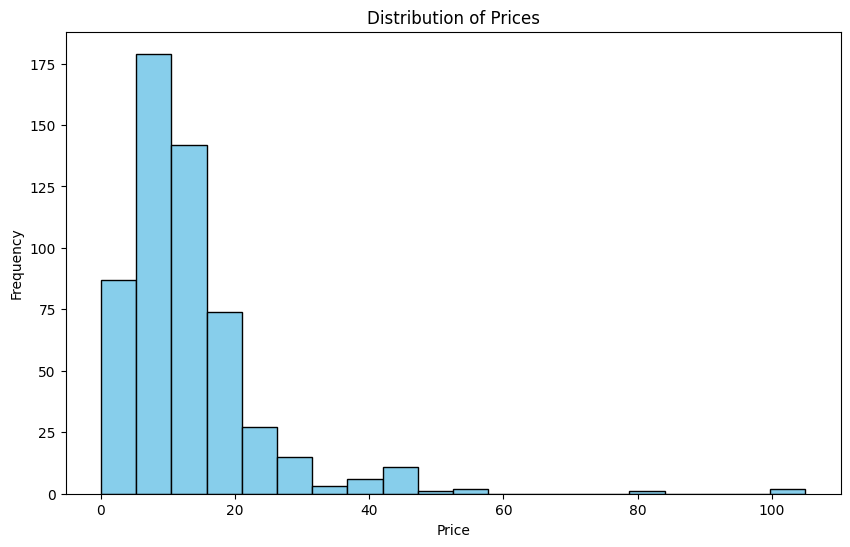

In [75]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [76]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Максимальна ціна? - " + str(max_price) + "\n")
    file.write("Мінімальна ціна? - " + str(min_price) + "\n")
    file.write("Середня ціна? - " + str(mean_price) + "\n")
    file.write("Медіанна ціна? - " + str(median_price) + "\n")

In [77]:
max_rating = df['user_rating'].max()
books_with_max_rating = df[df['user_rating'] == max_rating]
num_books_with_max_rating = books_with_max_rating.shape[0]

max_reviews_book = df[df['reviews'] == df['reviews'].max()]

top_50_2015 = df[(df['year'] == 2015) & (df['genre'] == 'Fiction')].sort_values(by='price')
cheapest_top_50_2015 = top_50_2015[top_50_2015['price'] < 8]

num_fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]

num_books_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]

sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

last_book = sorted_books.iloc[-1]

with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Який рейтинг у датасеті найвищий? - " + str(max_rating) + "\n")
    file.write("Скільки книг мають такий рейтинг? - " + str(num_books_with_max_rating) + "\n")
    file.write("Яка книга має найбільше відгуків? - " + max_reviews_book.iloc[0]['name'] + "\n")
    file.write("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? - " + cheapest_top_50_2015.iloc[-1]['name'] + "\n")
    file.write("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? - " + str(num_fiction_top_50_2010) + "\n")
    file.write("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? - " + str(num_books_rating_4_9) + "\n")
    file.write("Яка книга остання у відсортованому списку? - " + last_book['name'] + "\n")


In [78]:
price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Максимальна ціна для жанру Fiction: " + str(price_stats.loc['Fiction', 'max']) + "\n")
    file.write("Мінімальна ціна для жанру Fiction: " + str(price_stats.loc['Fiction', 'min']) + "\n")
    file.write("Максимальна ціна для жанру Non Fiction: " + str(price_stats.loc['Non Fiction', 'max']) + "\n")
    file.write("Мінімальна ціна для жанру Non Fiction: " + str(price_stats.loc['Non Fiction', 'min']) + "\n")

In [79]:
author_books_count = df.groupby('author').agg({'name': 'count'}).reset_index()
author_books_count.columns = ['author', 'books_count']

table_shape = author_books_count.shape

max_books_author = author_books_count.loc[author_books_count['books_count'].idxmax()]

with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Розмір таблиці: " + str(table_shape) + "\n")
    file.write("Автор з найбільшою кількістю книг: " + max_books_author['author'] + "\n")
    file.write("Кількість книг цього автора: " + str(max_books_author['books_count']) + "\n")

In [80]:
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
author_avg_rating.columns = ['author', 'avg_rating']

min_avg_rating_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]

with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Автор з найнижчим середнім рейтингом: " + min_avg_rating_author['author'] + "\n")
    file.write("Середній рейтинг для цього автора: " + str(min_avg_rating_author['avg_rating']) + "\n")

In [81]:

merged_df = pd.concat([author_books_count, author_avg_rating['avg_rating']], axis=1)
merged_df.columns = ['author', 'books_count', 'avg_rating']

sorted_df = merged_df.sort_values(by=['books_count', 'avg_rating'])

first_author = sorted_df.iloc[0]['author']
with open("відповідь.txt", "a", encoding="utf-8") as file:
    file.write("Перший автор у списку: " + first_author + "\n")